In [2]:
# !pip install causalml
# !pip install cem
# !pip install --upgrade causalml

!pip install git+https://github.com/lewisbails/cem.git


  Cloning https://github.com/lewisbails/cem.git to /private/var/folders/wv/hwbqckzs32s584v10_cgt5r80000gn/T/pip-req-build-l1ydr0gd
  Running command git clone -q https://github.com/lewisbails/cem.git /private/var/folders/wv/hwbqckzs32s584v10_cgt5r80000gn/T/pip-req-build-l1ydr0gd
  Resolved https://github.com/lewisbails/cem.git to commit fe0bfc59a6352e316971c16a7486cf0b7b474366
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [6]:
import pandas as pd
from cem import CEM



# Load your data
df = pd.read_csv('diversity_movies.csv')
# Define your treatment and outcome
treatment = 'genres'  # Replace with the variable you're analyzing
outcome = 'diversity_score'

# Example of coarsening a variable, adjust as needed
# df['genres_coarsened'] = coarsen(df['genres'], method='your_method')

# Ensure correct data types
df['diversity_score'] = pd.to_numeric(df['diversity_score'], errors='coerce')

# Assuming CEM is a function or class from your CEM package
cem = CEM(df, treatment, outcome)
df_matched = cem.match()

te = cem.estimate_ATE()
te_heterogeneity = cem.estimate_ATE(heterogeneity=True)

# Plot your results
cem.plot()




ImportError: cannot import name 'CEM' from 'cem' (unknown location)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load the data
df = pd.read_csv('Data/diversity_movies.csv')

df.head()

# Step 2: Preprocess the data
# For example, convert budget, domestic_revenue, international_revenue, and worldwide_revenue to numeric values
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['domestic_revenue'] = pd.to_numeric(df['domestic_revenue'], errors='coerce')
df['international_revenue'] = pd.to_numeric(df['international_revenue'], errors='coerce')
df['worldwide_revenue'] = pd.to_numeric(df['worldwide_revenue'], errors='coerce')

# Step 3: Bin the movies
# You can define your own bins for genres and budget. For example:
genre_bins = df['genres'].apply(lambda x: eval(x)).explode().unique()  # Adjust this as per actual genre column
budget_bins = [0, 10000000, 50000000, 100000000, 500000000]  # Define budget bins as you see fit

# Create a new column for genre bins - here's an example of how you might bin by the first genre listed
df['genre_bin'] = df['genres'].apply(lambda x: x[2:-2].split("', '")[0])  # Simplistic approach, adjust as needed

# Create a new column for budget bins
df['budget_bin'] = pd.cut(df['budget'], budget_bins, labels=['Low', 'Medium', 'High', 'Blockbuster'])

# Define the edges of your bins, starting from the earliest decade you want to include
bin_edges = [year for year in range(1980, 2030, 10)]

# Create labels for your bins
bin_labels = [f"{year}s" for year in range(1990, 2030, 10)]

# Use pd.cut to create decade bins
df['decade'] = pd.cut(df['year'], bins=bin_edges, labels=bin_labels, right=False)


#Step 4: Calculate metrics


# Step 4: Calculate profits
# Filter out rows where either worldwide_revenue or budget is zero
df = df.loc[(df['worldwide_revenue'] > 0) & (df['budget'] > 0)]

# Calculate profit
df['profit'] = df['worldwide_revenue'] - df['budget']

#print all the bins
print(genre_bins)
#print number of entries in each genre bin
print(df['genre_bin'].value_counts())
print(budget_bins)
print(df['budget_bin'].value_counts())

#print year bins
print(df['decade'].value_counts())


# Step 5: Analyze the results
# Print some basic stats about the dataset
print(df.describe())

# Step 5: Analyze the relationship between cast diversity and success metrics
# You would need to quantify cast diversity first, then you could use correlation analysis for example.



# Sample data creation (replace this with your actual dataframe)
# df = pd.read_csv('your_dataset.csv')

# Calculate correlations and p-values
corr_coefficient_tomatometer, p_value_tomatometer = stats.pearsonr(df['profit'], df['tomatometer'])
corr_coefficient_audience, p_value_audience = stats.pearsonr(df['profit'], df['audience_score'])

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# 1st subplot for Profit vs. Tomatometer
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.regplot(x='profit', y='tomatometer', data=df)
plt.title(f'Profit vs. Tomatometer\nCorrelation: {corr_coefficient_tomatometer:.2f}, P-value: {p_value_tomatometer:.4f}')

# 2nd subplot for Profit vs. Audience Score
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.regplot(x='profit', y='audience_score', data=df)
plt.title(f'Profit vs. Audience Score\nCorrelation: {corr_coefficient_audience:.2f}, P-value: {p_value_audience:.4f}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#Do the same analysis wiht the different bins

# Group by budget bin and calculate correlation within each bin
for budget_label in df['budget_bin'].cat.categories:
    group = df[df['budget_bin'] == budget_label]
   
    corr_coefficient_tomatometer, p_value_tomatometer = stats.pearsonr(group['profit'], group['tomatometer'])
    corr_coefficient_audience, p_value_audience = stats.pearsonr(group['profit'], group['audience_score'])
   
    print(f"{budget_label} Bin - Profit vs. Tomatometer: Correlation: {corr_coefficient_tomatometer:.2f}, P-value: {p_value_tomatometer:.4f}")
    print(f"{budget_label} Bin - Profit vs. Audience Score: Correlation: {corr_coefficient_audience:.2f}, P-value: {p_value_audience:.4f}")

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(budget_bins) - 1, ncols=2, figsize=(8, 2 * (len(budget_bins) - 1)))

for i, budget_label in enumerate(df['budget_bin'].cat.categories):
    group = df[df['budget_bin'] == budget_label]
   
    # 1st column of subplots for Profit vs. Tomatometer
    sns.regplot(ax=axes[i, 0], x='profit', y='tomatometer', data=group)
    axes[i, 0].set_title(f'{budget_label} Bin - Profit vs. Tomatometer')
   
    # 2nd column of subplots for Profit vs. Audience Score
    sns.regplot(ax=axes[i, 1], x='profit', y='audience_score', data=group)
    axes[i, 1].set_title(f'{budget_label} Bin - Profit vs. Audience Score')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
#plt.show()

# Group by year bin and calculate correlation within each bin
for year_label in df['decade'].cat.categories:
    group = df[df['decade'] == year_label]
   
    corr_coefficient_tomatometer, p_value_tomatometer = stats.pearsonr(group['profit'], group['tomatometer'])
    corr_coefficient_audience, p_value_audience = stats.pearsonr(group['profit'], group['audience_score'])
   
    print(f"{year_label} Bin - Profit vs. Tomatometer: Correlation: {corr_coefficient_tomatometer:.2f}, P-value: {p_value_tomatometer:.4f}")
    print(f"{year_label} Bin - Profit vs. Audience Score: Correlation: {corr_coefficient_audience:.2f}, P-value: {p_value_audience:.4f}")


# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(bin_labels), ncols=2, figsize=(14, 6 * len(bin_labels)))
for i, label in enumerate(bin_labels):
    group = df[df['decade'] == label]
    # 1st column of subplots for Profit vs. Tomatometer
    sns.regplot(ax=axes[i, 0], x='profit', y='tomatometer', data=group)
    axes[i, 0].set_title(f'{label} Bin - Profit vs. Tomatometer')
    # 2nd column of subplots for Profit vs. Audience Score
    sns.regplot(ax=axes[i, 1], x='profit', y='audience_score', data=group)
    axes[i, 1].set_title(f'{label} Bin - Profit vs. Audience Score')
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/diversity_movies.csv'

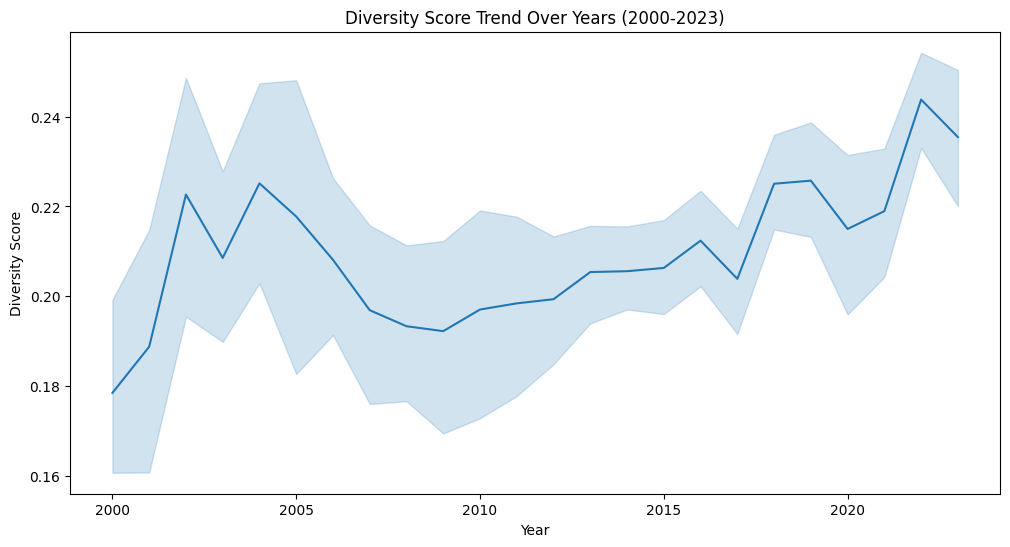

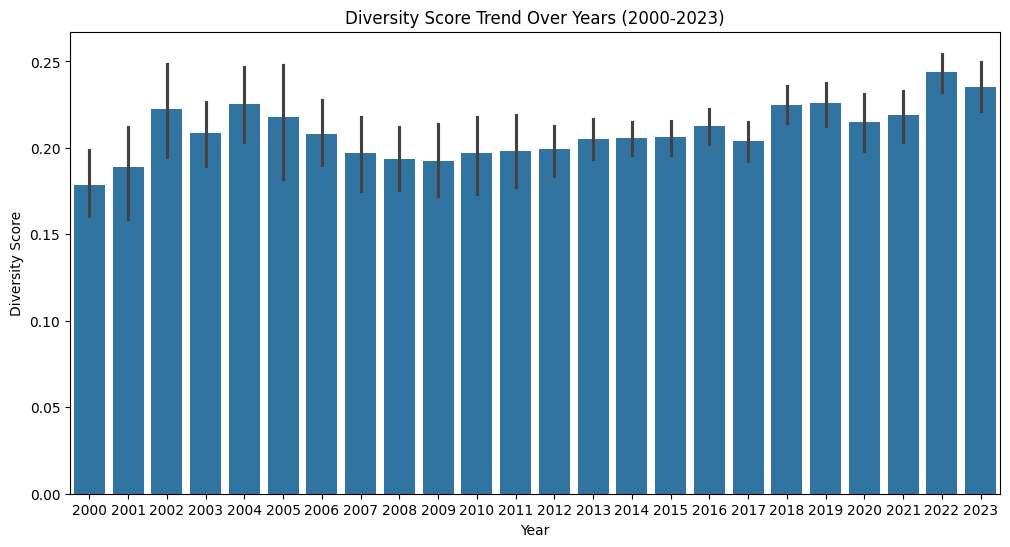

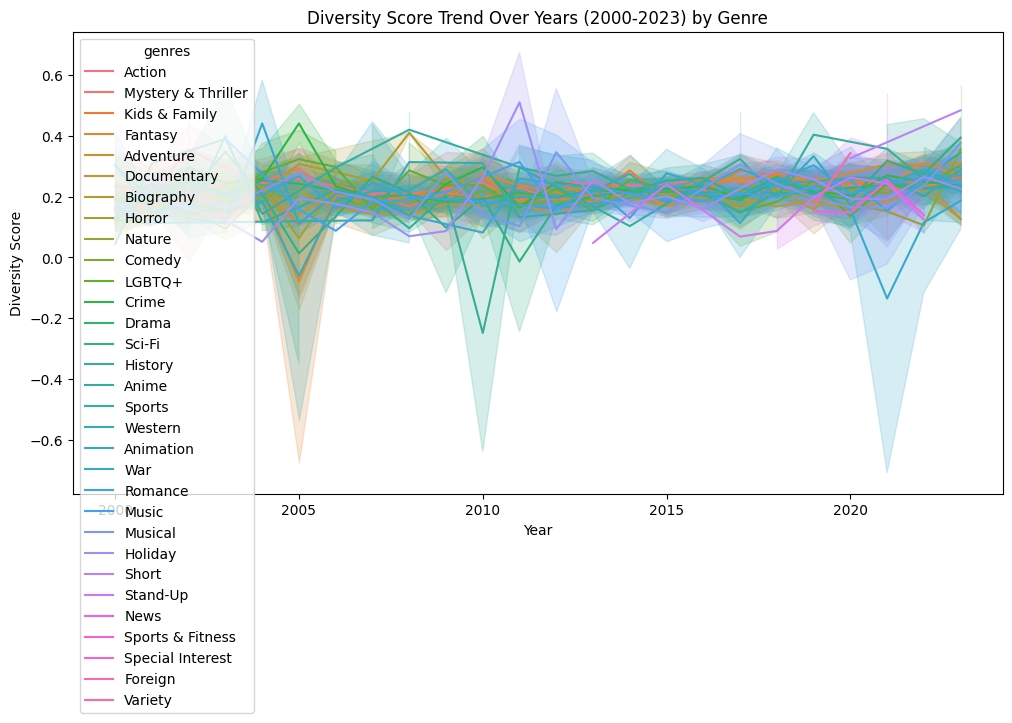

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load the data
df = pd.read_csv('diversity_movies.csv')

# Convert 'year' to datetime and extract the year
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

# Ensure 'diversity_score' is a float
df['diversity_score'] = df['diversity_score'].astype(float)


# Plotting diversity score over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='diversity_score')
plt.title('Diversity Score Trend Over Years (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Diversity Score')
plt.show()

#plot in in a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='year', y='diversity_score')
plt.title('Diversity Score Trend Over Years (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Diversity Score')
plt.show()


# Plotting diversity score over years by genre

# Convert 'genres' to a list
df['genres'] = df['genres'].apply(lambda x: eval(x))

# Explode the list into rows
df = df.explode('genres')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='diversity_score', hue='genres')
plt.title('Diversity Score Trend Over Years (2000-2023) by Genre')
plt.xlabel('Year')
plt.ylabel('Diversity Score')
plt.show()



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_base.py:1450: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  self.plot_data[axis] = cat_data


ValueError: cannot reindex on an axis with duplicate labels

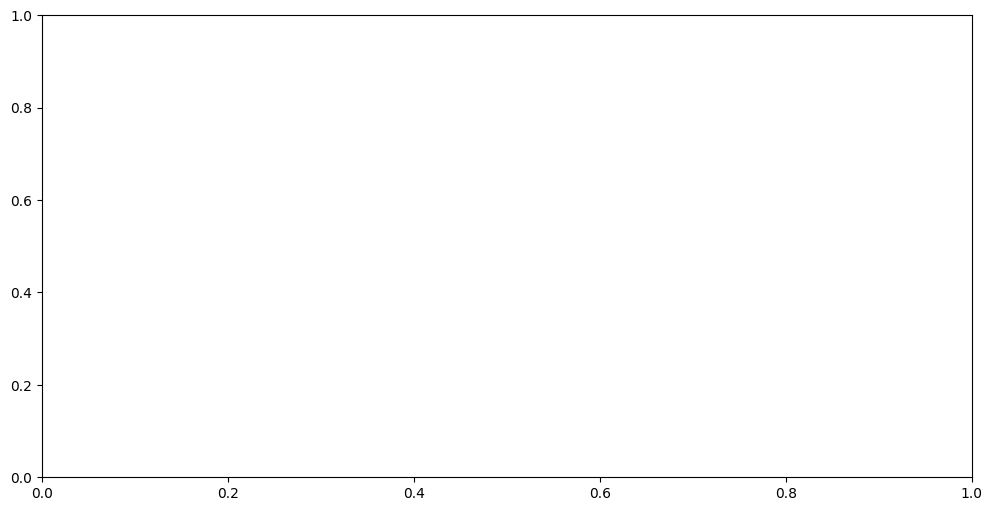

In [11]:
# Custom function to convert genre string to list
def convert_genre_string_to_list(genre):
    if isinstance(genre, list):
        return genre  # Return the list as is
    elif isinstance(genre, str):
        genre = genre.strip("[]")  # Remove square brackets
        genre_list = genre.split(", ")  # Split by comma and space
        return [g.strip("'\"") for g in genre_list]  # Remove single and double quotes
    else:
        return []  # Return an empty list for any other data type

# Apply the function to the 'genres' column
df['genres'] = df['genres'].apply(convert_genre_string_to_list)

# Explode the dataframe on 'genres'
df_exploded = df.explode('genres')

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

plt.figure(figsize=(12, 6))
sns.barplot(data=df_exploded, x='genres', y='diversity_score', estimator=mean)
plt.xticks(rotation=45)
plt.title('Average Diversity Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Diversity Score')
plt.show()


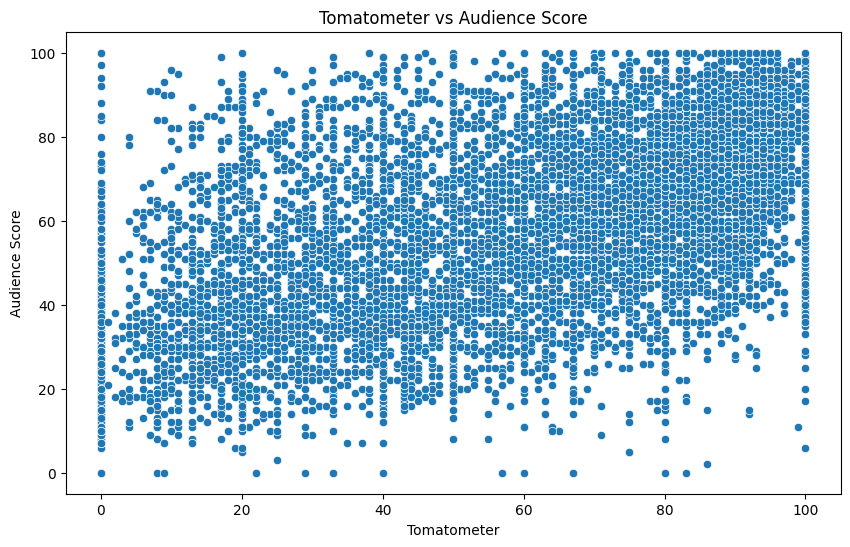

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('diversity_movies.csv')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tomatometer', y='audience_score')
plt.title('Tomatometer vs Audience Score')
plt.xlabel('Tomatometer')
plt.ylabel('Audience Score')
plt.show()




                                           name  tomatometer  audience_score  \
0                                         Mercy            0              20   
1                             Peter Pan & Wendy           64              11   
2                                      Stan Lee           81              84   
3                 Still: A Michael J. Fox Movie           99              95   
4  Hell House LLC Origins: The Carmichael Manor           83              86   

   weighted_score                                     genres rating duration  \
0               6           ['Action', 'Mystery & Thriller']      R   1h 25m   
1              46  ['Kids & Family', 'Fantasy', 'Adventure']     PG   1h 46m   
2              82               ['Documentary', 'Biography']    NaN   1h 26m   
3              97               ['Documentary', 'Biography']      R   1h 35m   
4              84                                 ['Horror']    NaN   1h 37m   

   year                               

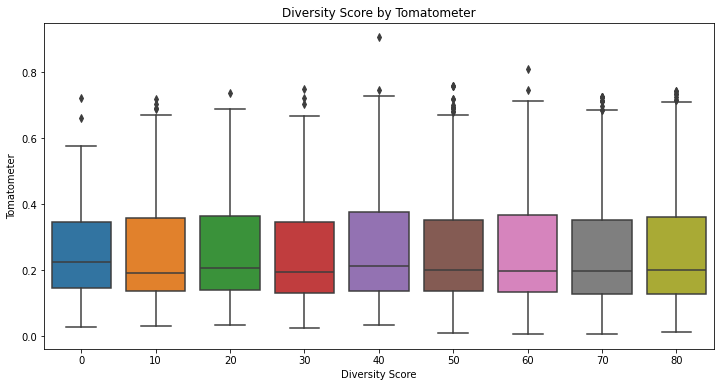

In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('diversity_movies.csv')

print(df.head())

# tomatometer in ranges of 10
# Whisker plot of diversity score by tomatormeter and audience score

# Step 1: Create bins for tomatometer
tomatometer_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# Step 2: Create a new column for tomatometer bins
df['tomatometer_bin'] = pd.cut(df['tomatometer'], bins=tomatometer_bins, labels=tomatometer_bins[:-1])

# Step 3: Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='tomatometer_bin', y='diversity_score')
plt.title('Diversity Score by Tomatometer')
plt.xlabel('Diversity Score')
plt.ylabel('Tomatometer')
plt.show()




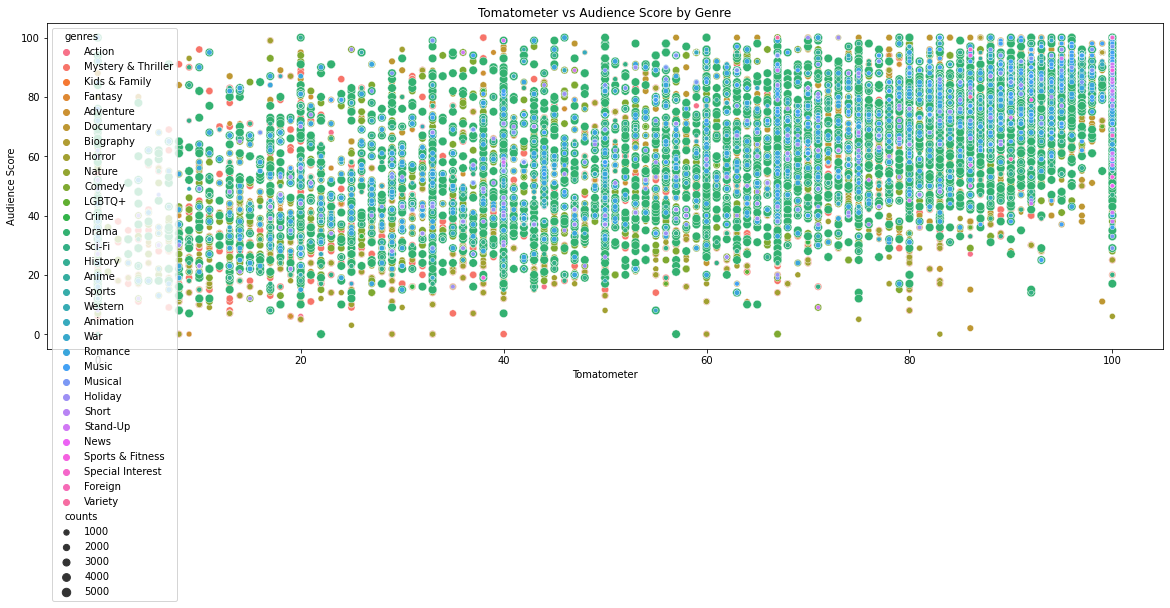

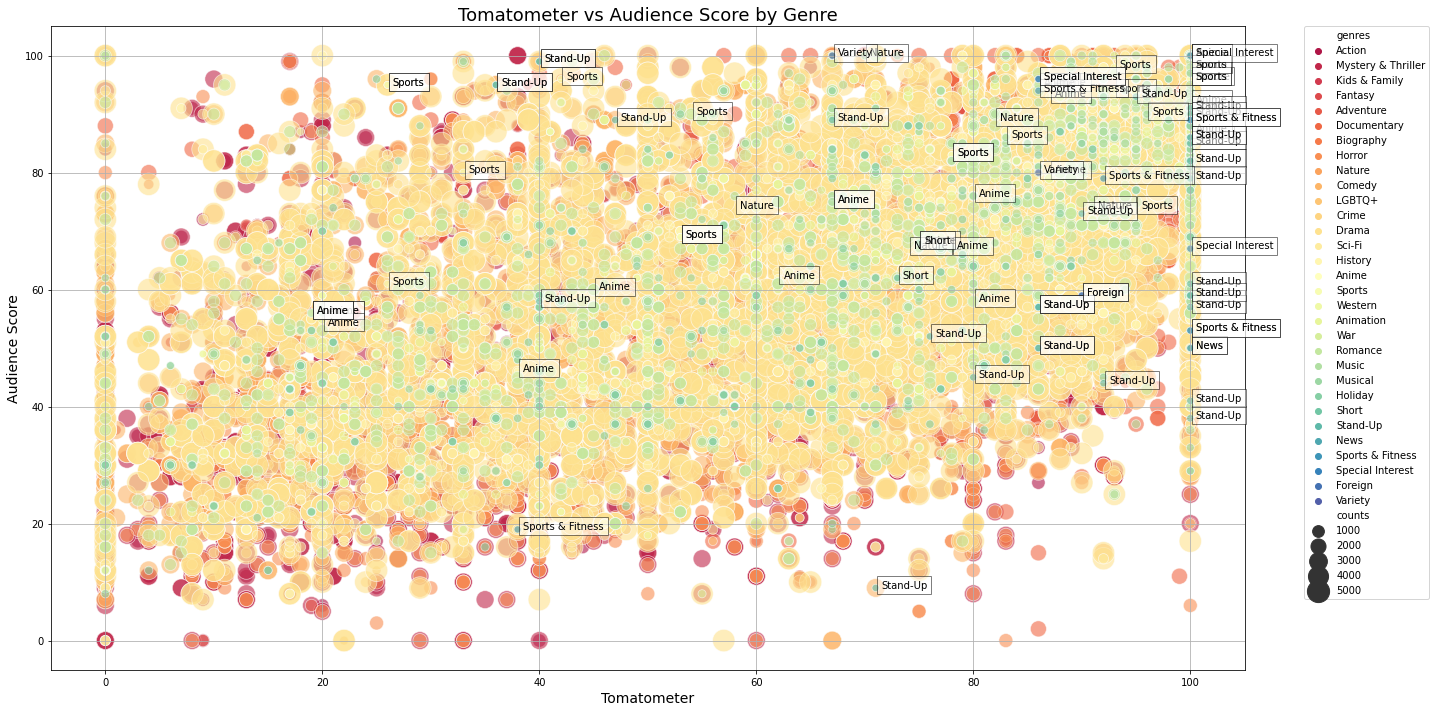

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/movies_bubble_chart.png'

<Figure size 432x288 with 0 Axes>

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plotting diversity score over years by genre
df = pd.read_csv('diversity_movies.csv')

# Convert 'genres' to a list
df['genres'] = df['genres'].apply(lambda x: eval(x))

# Explode the list into rows
df = df.explode('genres')


# create a bubble chart with genre (number of movies), tomatormeter, audience score, and diversity score
# Step 1: Calculate the number of movies per genre
df_genre_counts = df.groupby('genres').size().reset_index(name='counts')

# Step 2: Merge the counts with the original dataframe
df = df.merge(df_genre_counts, on='genres')

# Step 3: Plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='tomatometer', y='audience_score', size='counts', hue='genres')
plt.title('Tomatometer vs Audience Score by Genre')
plt.xlabel('Tomatometer')
plt.ylabel('Audience Score')
plt.show()



plt.figure(figsize=(20, 10))  # Bigger plot size
bubble_opacity = 0.6  # Set bubble opacity
bubble_size_multiplier = 100  # Increase this to make the bubbles larger

# Create the scatter plot
scatter_plot = sns.scatterplot(
    data=df, 
    x='tomatometer', 
    y='audience_score', 
    size='counts', 
    sizes=(50, 500),  # Controls the range of bubble sizes
    hue='genres', 
    palette='Spectral',  # A visually pleasing color palette
    alpha=bubble_opacity,  # Set the opacity level
    edgecolor='w',  # White edgecolor for better separation
    legend='brief'  # 'brief' or 'full', depending on preference
)

# Improve the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Add gridlines for better readability
plt.grid(True)

# Set title and labels with increased font size
scatter_plot.set_title('Tomatometer vs Audience Score by Genre', fontsize=18)
scatter_plot.set_xlabel('Tomatometer', fontsize=14)
scatter_plot.set_ylabel('Audience Score', fontsize=14)

threshold = 80  # Set your own threshold

# Optionally, add annotations directly for genres with few movies
for i in range(df.shape[0]):
    if df.iloc[i]['counts'] < threshold:  # Set your own threshold
        plt.text(x=df.iloc[i]['tomatometer']+0.5,  # X location of text
                 y=df.iloc[i]['audience_score'],  # Y location of text
                 s=df.iloc[i]['genres'],  # Text label
                 fontdict=dict(color='black', size=10),
                 bbox=dict(facecolor='white', alpha=0.5))

# Show the plot with a tight layout to ensure everything fits
plt.tight_layout()
plt.show()

# Save the figure as a high-quality PNG
plt.savefig('/mnt/data/movies_bubble_chart.png', format='png', dpi=300, bbox_inches='tight')



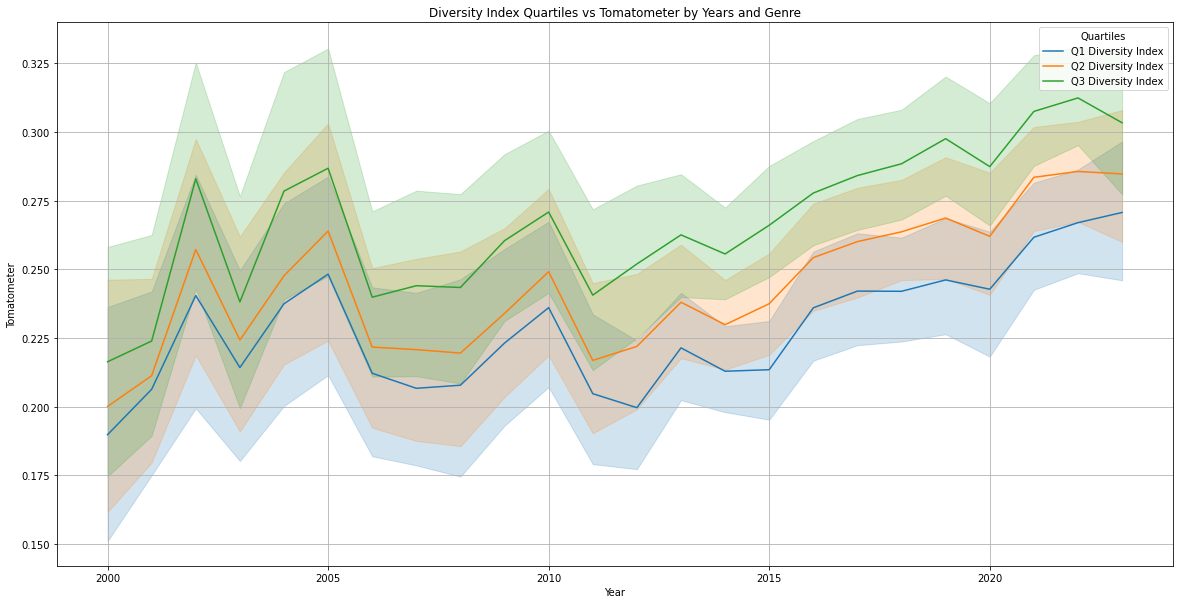

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plotting diversity score over years by genre
df = pd.read_csv('diversity_movies.csv')

# Create a new dataframe to hold quartile data
df_quartiles = df.groupby(['year', 'genres'])['diversity_score'].quantile([0.25, 0.5, 0.75]).unstack(level=-1)
df_quartiles.columns = ['Q1', 'Q2', 'Q3']  # Rename the columns to quartiles
df_quartiles.reset_index(inplace=True)

# Now, we need to average the tomatometer for each year and genre
df_tomatometer_avg = df.groupby(['year', 'genres'])['tomatometer'].mean().reset_index()

# Merge the quartile dataframe with the tomatometer average dataframe
df_merged = pd.merge(df_quartiles, df_tomatometer_avg, on=['year', 'genres'])

# Now we can plot each quartile
plt.figure(figsize=(20, 10))

# Plotting each quartile line
for quartile in ['Q1', 'Q2', 'Q3']:
    sns.lineplot(data=df_merged, x='year', y=quartile, label=f'{quartile} Diversity Index')

plt.title('Diversity Index Quartiles vs Tomatometer by Years and Genre')
plt.xlabel('Year')
plt.ylabel('Tomatometer')
plt.legend(title='Quartiles')
plt.grid(True)
plt.show()



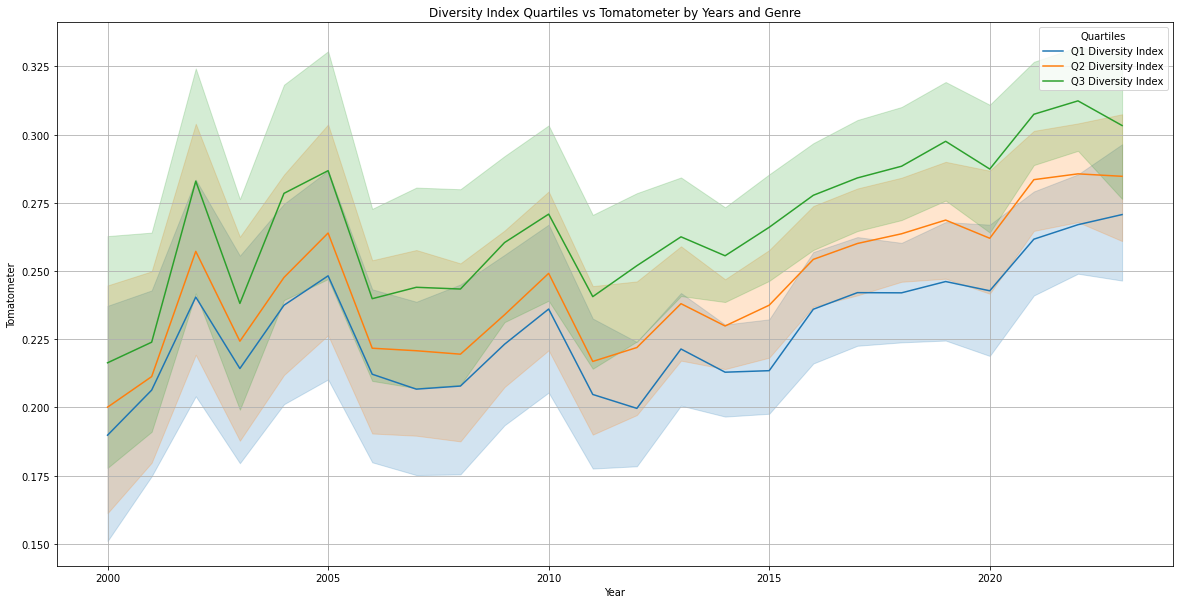

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plotting diversity score over years by genre
df = pd.read_csv('diversity_movies.csv')

# Create a new dataframe to hold quartile data
df_quartiles = df.groupby(['year', 'genres'])['diversity_score'].quantile([0.25, 0.5, 0.75]).unstack(level=-1)
df_quartiles.columns = ['Q1', 'Q2', 'Q3']  # Rename the columns to quartiles
df_quartiles.reset_index(inplace=True)

# Now, we need to average the tomatometer for each year and genre
df_tomatometer_avg = df.groupby(['year', 'genres'])['audience_score'].mean().reset_index()

# Merge the quartile dataframe with the tomatometer average dataframe
df_merged = pd.merge(df_quartiles, df_tomatometer_avg, on=['year', 'genres'])

# Now we can plot each quartile
plt.figure(figsize=(20, 10))

# Plotting each quartile line
for quartile in ['Q1', 'Q2', 'Q3']:
    sns.lineplot(data=df_merged, x='year', y=quartile, label=f'{quartile} Diversity Index')

plt.title('Diversity Index Quartiles vs Tomatometer by Years and Genre')
plt.xlabel('Year')
plt.ylabel('Tomatometer')
plt.legend(title='Quartiles')
plt.grid(True)
plt.show()






In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Plotting diversity score over years by genre
df = pd.read_csv('diversity_movies.csv')

# pritn the head in a table
print(df.head())


# #  comveert diverse score to binary (diverse or not diverse) if diverse score is greater than 0.5
# df['diverse'] = df['diversity_score'].apply(lambda x: 1 if x > 0.5 else 0)

# df.head()

# # update the fiel with the new binary value
# df.to_csv('diversity_movies.csv', index=False)

# # Create a new dataframe to hold quartile data
# df_quartiles = df.groupby(['year', 'genres'])['diverse'].mean().unstack(level=-1)
# df_quartiles.columns = ['Q1', 'Q2', 'Q3']  # Rename the columns to quartiles
# df_quartiles.reset_index(inplace=True)

# # Now, we need to average the tomatometer for each year and genre
# df_tomatometer_avg = df.groupby(['year', 'genres'])['tomatometer'].mean().reset_index()

# # Merge the quartile dataframe with the tomatometer average dataframe




                                           name  tomatometer  audience_score  \
0                                         Mercy            0              20   
1                             Peter Pan & Wendy           64              11   
2                                      Stan Lee           81              84   
3                 Still: A Michael J. Fox Movie           99              95   
4  Hell House LLC Origins: The Carmichael Manor           83              86   

   weighted_score                                     genres rating duration  \
0               6           ['Action', 'Mystery & Thriller']      R   1h 25m   
1              46  ['Kids & Family', 'Fantasy', 'Adventure']     PG   1h 46m   
2              82               ['Documentary', 'Biography']    NaN   1h 26m   
3              97               ['Documentary', 'Biography']      R   1h 35m   
4              84                                 ['Horror']    NaN   1h 37m   

   year                               

In [29]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataframe
df = pd.read_csv('diversity_movies.csv')

# Since 'genres', 'actors', and 'directors' are categorical, you need to convert them to a format that can be used in regression, such as one-hot encoding
df = pd.get_dummies(df, columns=['genres', 'rating', 'actors', 'directors'], drop_first=True)

# Assuming 'name' is just an identifier and not a predictor, we'll exclude it from the regression
X = df.drop(columns=['name', 'diversity_score'])
y = df['diversity_score']

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [30]:
# Randomized base line model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your dataframe
df = pd.read_csv('diversity_movies.csv')

# Since 'genres', 'actors', and 'directors' are categorical, you need to convert them to a format that can be used in regression, such as one-hot encoding
df = pd.get_dummies(df, columns=['genres', 'rating', 'actors', 'directors'], drop_first=True)

# Assuming 'name' is just an identifier and not a predictor, we'll exclude it from the regression
X = df.drop(columns=['name', 'diversity_score'])
y = df['diversity_score']

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Create a new dataframe with the same columns as X
df_random = pd.DataFrame(columns=X.columns)

# Create a new column with random values
df_random['random'] = np.random.uniform(size=df_random.shape[0])

# Fit the regression model
model_random = sm.OLS(y, df_random).fit()

# Print the summary of the regression
print(model_random.summary())

# Compare the two models
print(model.compare_f_test(model_random))

# Plot the residuals
plt.figure(figsize=(12, 6))
sns.scatterplot(x=model_random.predict(), y=model_random.resid)
plt.title('Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

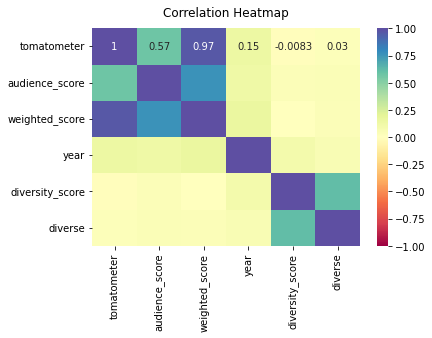

In [41]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

